
<center> <h1 style="background-color:purple; color:white" >RFM Analysis</h1> 

<center><img
src="https://s3-eu-west-1.amazonaws.com/blog.omniconvert.com-media/blog/wp-content/uploads/2016/03/06173334/feature-img-marketizator-rfm.png" style="width:100%;height:40%;">
</center>
    
<br>    
    
<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" style="background-color:purple; color:white" data-toggle="list"  role="tab" aria-controls="home">Notebook Content!</h3>  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#libraries" role="tab" aria-controls="profile" style="color:purple">Import Libraries<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">1</span></a>
  <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#load" role="tab" aria-controls="messages" style="color:purple">Load Data<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">2</span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#missing" role="tab" aria-controls="settings" style="color:purple">Missing Values<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#summary" role="tab" aria-controls="settings" style="color:purple">Summary Stats & Outlier Values<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#rfm" role="tab" aria-controls="settings" style="color:purple">RFM<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">5</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#visualize" role="tab" aria-controls="settings" style="color:purple"> Visualize<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">6</span></a>
    </a>


<h1 style="color:purple" >RFM - Recency Frequency Monetary</h1> 

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

RFM stands for the three dimensions:

- **R**ecency – How recently did the customer purchase?
- **F**requency – How often do they purchase?
- **M**onetary Value – How much do they spend?

Customer purchases may be represented by a table with columns for the customer name, date of purchase and purchase value. One approach to RFM is to assign a score for each dimension on a scale from 1 to 10. The maximum score represents the preferred behavior and a formula could be used to calculate the three scores for each customer. For example, a service-based business could use these calculations:

- **Recency** = the maximum of "10 – the number of months that have passed since the customer last purchased" and 1
- **Frequency** = the maximum of "the number of purchases by the customer in the last 12 months (with a limit of 10)" and 1
- **Monetary** = the highest value of all purchases by the customer expressed as a multiple of some benchmark value

Alternatively, categories can be defined for each attribute. For instance, Recency might be broken into three categories: customers with purchases within the last 90 days; between 91 and 365 days; and longer than 365 days. Such categories may be derived from business rules or using data mining techniques to find meaningful breaks.

Once each of the attributes has appropriate categories defined, segments are created from the intersection of the values. If there were three categories for each attribute, then the resulting matrix would have twenty-seven possible combinations (one well-known commercial approach uses five bins per attributes, which yields 125 segments). Companies may also decide to collapse certain subsegments, if the gradations appear too small to be useful. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value). Identifying the most valuable RFM segments can capitalize on chance relationships in the data used for this analysis. For this reason, it is highly recommended that another set of data be used to validate the results of the RFM segmentation process. Advocates of this technique point out that it has the virtue of simplicity: no specialized statistical software is required, and the results are readily understood by business people. In the absence of other targeting techniques, it can provide a lift in response rates for promotions.

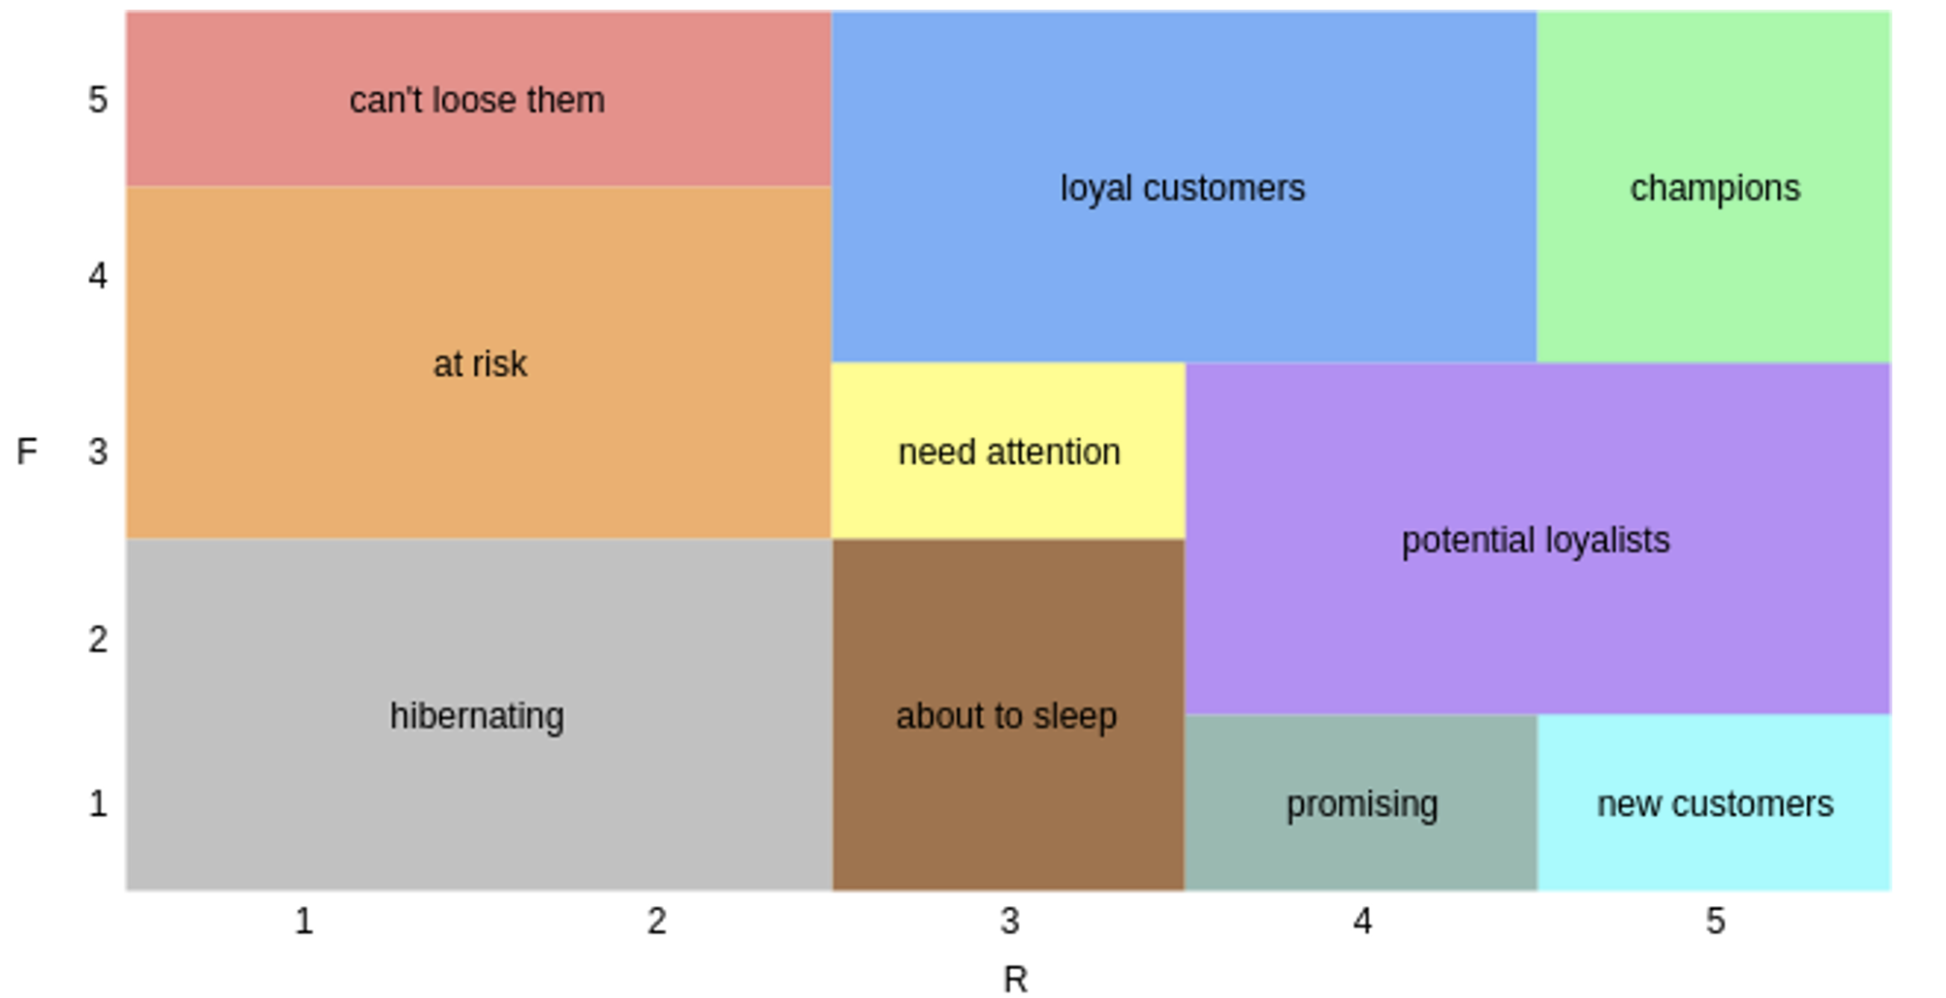

<a id='libraries'></a>
<h1 style="color:purple" >1. Packages</h1> 

In [1]:
# ----------------------------
# BASE
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# ----------------------------
# TREEMAP
# pip install squarify
import squarify  

# ----------------------------
# CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

<a id='load'></a>
<h1 style="color:purple" >2. Data</h1> 

In [2]:
# the filename to load test data
csv_data_filename = 'online_retail.csv'
#raw9 = pd.read_excel("../input/online-retail-ii-dataset/online_retail_II.xlsx", sheet_name = "Year 2009-2010")
# raw10 = pd.read_excel("../input/online-retail-ii-dataset/online_retail_II.xlsx", sheet_name = "Year 2010-2011")
#df1 = raw9.copy()
#df2 = raw10.copy()
data_reader = pd.read_csv(csv_data_filename)
dfx = pd.DataFrame(data_reader)

In [3]:
(dfx.shape)

(525461, 8)

In [4]:
dfx

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


<a id='missing'></a>
<h1 style="color:purple" >3. Missing Values</h1> 

In [5]:
print("2009-2010")
print("Missing Frequency: \n")
print(dfx.isnull().sum().sort_values(ascending = False), "\n")
print("Missing Proportion: \n")
print((dfx.isnull().sum() / dfx.shape[0]).sort_values(ascending = False))
print("")

#print("2010-2011")
#print("Missing Frequency: \n")
#print(df2.isnull().sum().sort_values(ascending = False), "\n")
#print("Missing Proportion: \n")
#print((df2.isnull().sum() / df2.shape[0]).sort_values(ascending = False))

2009-2010
Missing Frequency: 

Customer ID    107927
Description      2928
Invoice             0
StockCode           0
Quantity            0
InvoiceDate         0
Price               0
Country             0
dtype: int64 

Missing Proportion: 

Customer ID   0.21
Description   0.01
Invoice       0.00
StockCode     0.00
Quantity      0.00
InvoiceDate   0.00
Price         0.00
Country       0.00
dtype: float64



In [6]:
# Remove Missing Values
dfx.dropna(inplace = True)
# df2.dropna(inplace = True)

<a id='summary'></a>
<h1 style="color:purple" >4. Summary Stats & Outlier Values</h1> 

In [7]:
# 2009-2010
dfx.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,50%,90%,95%,99%,max
Quantity,417534.00,12.76,101.22,-9360.00,-2.00,1.00,1.00,1.00,4.00,24.00,36.00,144.00,19152.00
Price,417534.00,3.89,71.13,0.00,0.29,0.42,0.65,0.85,1.95,6.75,8.50,14.95,25111.09
Customer ID,417534.00,15360.65,1680.81,12346.00,12435.00,12725.00,13042.00,13624.00,15311.00,17706.00,17913.00,18196.00,18287.00


In [8]:
# 2010-2011
#df2.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

**Remove negative values!**

Negative values are returned items.

In [9]:
dfx = dfx[~dfx["Invoice"].str.contains("C", na = False)]
# df2 = df2[~df2["Invoice"].str.contains("C", na = False)]

In [10]:
dfx.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,50%,90%,95%,99%,max
Quantity,407695.00,13.59,96.84,1.00,1.00,1.00,1.00,2.00,5.00,24.00,36.00,144.00,19152.00
Price,407695.00,3.29,34.76,0.00,0.29,0.42,0.65,0.85,1.95,6.75,8.50,14.95,10953.50
Customer ID,407695.00,15368.50,1679.80,12346.00,12435.00,12731.00,13044.00,13635.00,15321.00,17706.00,17913.00,18196.00,18287.00


In [11]:
#df2.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

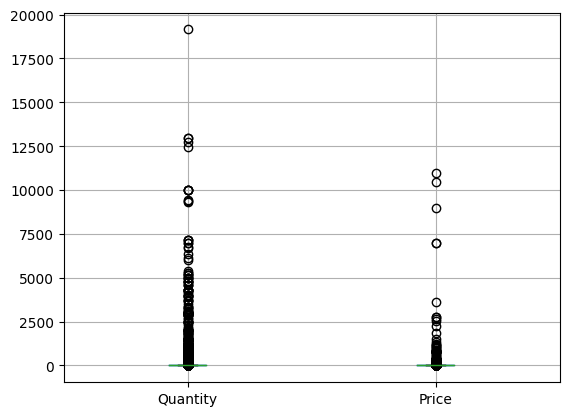

In [12]:
dfx[["Quantity", "Price"]].boxplot();

In [13]:
#df2[["Quantity", "Price"]].boxplot()

<a id='rfm'></a>
<h1 style="color:purple" >5. RFM Analysis</h1> 

<h2 style="color:purple" >Recency</h2> 

In [16]:
print("2009-2010: Min Date", dfx["InvoiceDate"].min(), "Max Date", dfx["InvoiceDate"].max())
#print("2010-2011: Min Date", df2["InvoiceDate"].min(), "Max Date", df2["InvoiceDate"].max())

2009-2010: Min Date 2009-12-01 07:45:00 Max Date 2010-12-09 20:01:00


In [28]:
group_Customer_ID_and_InvoiceDate = dfx.groupby("Customer ID").agg({"InvoiceDate":"max"})
group_Customer_ID_and_InvoiceDate['InvoiceDate'] = pd.to_datetime(group_Customer_ID_and_InvoiceDate['InvoiceDate'], format='%Y-%m-%d %H:%M:%S')
print(group_Customer_ID_and_InvoiceDate)

                    InvoiceDate
Customer ID                    
12346.00    2010-06-28 13:53:00
12347.00    2010-12-07 14:57:00
12348.00    2010-09-27 14:59:00
12349.00    2010-10-28 08:23:00
12351.00    2010-11-29 15:23:00
...                         ...
18283.00    2010-11-22 15:30:00
18284.00    2010-10-04 11:33:00
18285.00    2010-02-17 10:24:00
18286.00    2010-08-20 11:57:00
18287.00    2010-11-22 11:51:00

[4314 rows x 1 columns]


In [29]:
recency1 = (dt.datetime(2010, 12, 9) - group_Customer_ID_and_InvoiceDate ).rename(columns = {"InvoiceDate":"Recency"})
#recency2 = (dt.datetime(2011, 12, 9) - df2.groupby("Customer ID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})

recency1["Recency"] = recency1["Recency"].apply(lambda x: x.days)
#recency2["Recency"] = recency2["Recency"].apply(lambda x: x.days)

recency1.head()

,Recency
Customer ID,
12346.00,163
12347.00,1
12348.00,72
12349.00,41
12351.00,9


<h2 style="color:purple" >Frequency</h2> 


In [30]:
freq1 = dfx.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})
#freq2 = df2.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})

freq1

,Frequency
Customer ID,
12346.00,11
12347.00,2
12348.00,1
12349.00,3
12351.00,1
...,...
18283.00,6
18284.00,1
18285.00,1


<h2 style="color:purple" >Monetary</h2> 


In [31]:
dfx["TotalPrice"] = dfx["Quantity"] * dfx["Price"]
#df2["TotalPrice"] = df2["Quantity"] * df2["Price"]

monetary1 = dfx.groupby("Customer ID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})
#monetary2 = df2.groupby("Customer ID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})

monetary1.head()

,Monetary
Customer ID,
12346.00,372.86
12347.00,1323.32
12348.00,222.16
12349.00,2671.14
12351.00,300.93


In [32]:
rfm1 = pd.concat([recency1, freq1, monetary1],  axis=1)
#rfm2 = pd.concat([recency2, freq2, monetary2],  axis=1)

rfm1.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.00,163,11,372.86
12347.00,1,2,1323.32
12348.00,72,1,222.16
12349.00,41,3,2671.14
12351.00,9,1,300.93


<h2 style="color:purple" >Create RFM Score</h2> 

In [33]:
rfm1["RecencyScore"] = pd.qcut(rfm1["Recency"], 5, labels = [5, 4 , 3, 2, 1])
#rfm2["RecencyScore"] = pd.qcut(rfm2["Recency"], 5, labels = [5, 4 , 3, 2, 1])

rfm1["FrequencyScore"]= pd.qcut(rfm1["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
#rfm2["FrequencyScore"]= pd.qcut(rfm2["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

rfm1["MonetaryScore"] = pd.qcut(rfm1['Monetary'], 5, labels = [1, 2, 3, 4, 5])
#rfm2["MonetaryScore"] = pd.qcut(rfm2['Monetary'], 5, labels = [1, 2, 3, 4, 5])

rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346.00,163,11,372.86,2,5,2
12347.00,1,2,1323.32,5,2,4
12348.00,72,1,222.16,2,1,1
12349.00,41,3,2671.14,3,3,5
12351.00,9,1,300.93,5,1,2


In [34]:
# RFM Scores: Category
rfm1["RFM_SCORE"] = (rfm1['RecencyScore'].astype(str) + 
                     rfm1['FrequencyScore'].astype(str) + 
                     rfm1['MonetaryScore'].astype(str))

#rfm2["RFM_SCORE"] = (rfm2['RecencyScore'].astype(str) +  rfm2['FrequencyScore'].astype(str) +  rfm2['MonetaryScore'].astype(str))

rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346.00,163,11,372.86,2,5,2,252
12347.00,1,2,1323.32,5,2,4,524
12348.00,72,1,222.16,2,1,1,211
12349.00,41,3,2671.14,3,3,5,335
12351.00,9,1,300.93,5,1,2,512


In [37]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm1['Segment'] = rfm1['RecencyScore'].astype(str) + rfm1['FrequencyScore'].astype(str)
rfm1['Segment'] = rfm1['Segment'].replace(seg_map, regex=True)

#rfm2['Segment'] = rfm2['RecencyScore'].astype(str) + rfm2['FrequencyScore'].astype(str)
#rfm2['Segment'] = rfm2['Segment'].replace(seg_map, regex=True)

rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.00,163,11,372.86,2,5,2,252,Can't Loose
12347.00,1,2,1323.32,5,2,4,524,Potential Loyalists
12348.00,72,1,222.16,2,1,1,211,Hibernating
12349.00,41,3,2671.14,3,3,5,335,Need Attention
12351.00,9,1,300.93,5,1,2,512,New Customers


<h2 style="color:purple" >Summary Statistics</h2> 

In [38]:
rfmStats1 = rfm1[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats1.columns = rfmStats1.columns.map('_'.join).str.strip('|')
rfmStats1

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,51.85,51.00,343,10.26,1.20,1.00,343,0.40,442.27,317.76,343,417.30
At Risk,149.94,128.00,611,69.98,3.07,3.00,611,1.09,1188.21,760.19,611,1844.17
Can't Loose,121.72,106.50,78,49.72,9.04,7.50,78,5.78,4072.97,2316.49,78,5275.40
Champions,5.12,5.00,663,4.62,12.50,8.00,663,17.19,6852.26,2508.32,663,21556.38
Hibernating,212.31,211.00,1016,89.78,1.13,1.00,1016,0.33,401.98,250.16,1016,775.08
Loyal Customers,34.28,29.00,743,16.06,6.82,5.00,743,4.38,2743.48,1818.71,743,3255.11
Need Attention,51.21,51.00,207,9.84,2.45,2.00,207,0.50,1058.79,730.47,207,1190.26
New Customers,6.58,6.50,50,4.31,1.00,1.00,50,0.00,386.20,258.82,50,493.32
Potential Loyalists,16.77,17.00,516,9.73,2.02,2.00,516,0.70,729.16,523.66,516,837.55


In [ ]:
rfmStats2 = rfm2[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats2.columns = rfmStats2.columns.map('_'.join).str.strip('|')
rfmStats2

<a id='visualize'></a>
<h1 style="color:purple" >6. Visualize</h1> 

In [45]:
plt.figure(figsize = (25,8))
squarify.plot(sizes=rfmStats1.Recency_count, label=rfmStats1.index, 
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.4 )
plt.suptitle("Treemap: Number of Customers \n 2009-2010", fontsize=25);


In [44]:
#plt.figure(figsize = (25,8))
#squarify.plot(sizes=rfmStats2.Recency_count, label=rfmStats2.index, 
#              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.4 )
#plt.suptitle("Treemap: Number of Customers \n 2010-2011", fontsize=25);

<h3 style="color:purple" >If you like the notebook, don’t forget upvote! :)</h3> 
